Task 1

In [71]:
!pip install gdown
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import gdown

# Defining the Google Drive URL for the dataset
drive_url = "https://drive.google.com/uc?id=1jtSc2dKFQ6zOcC8w3_yJeBHYUP5umOnD"

# Defining the output file path where the dataset will be saved
output_file = "/content/drive/My Drive/orthopedic_patients.csv"

# Downloading the dataset from the Google Drive URL
gdown.download(drive_url, output_file, quiet=False)

# Loading the dataset into a pandas DataFrame
df = pd.read_csv(output_file)


Downloading...
From: https://drive.google.com/uc?id=1jtSc2dKFQ6zOcC8w3_yJeBHYUP5umOnD
To: /content/drive/My Drive/orthopedic_patients.csv
100%|██████████| 25.0k/25.0k [00:00<00:00, 31.9MB/s]


In [73]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

print()

# Display dataset information
print("Dataset information:")
print(df.info())

print()

# Display summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe())


First 5 rows of the dataset:
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                 

Task 2

In [74]:
# For data creation and other tasks
import numpy as np
import random
import pandas as pd

## Mertics to evaluate the models
from sklearn . metrics import accuracy_score # for Logistic Regression

# For plotting the graphs ..
import matplotlib . pyplot as plt
%matplotlib inline
import seaborn as sns

# For spliting the data into 80:20 ratio
from sklearn . model_selection import train_test_split

Task 3

In [75]:
import numpy as np

def weightInitialization(n_features):

    # Initialize weights (w) with zeros
    w = np.zeros((n_features, 1))

    # Initialize bias (b) to zero
    b = 0

    return w, b



n_features = 6  #  number of features in your dataset
w, b = weightInitialization(n_features)
print("(w):", w)
print("(b):", b)


(w): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(b): 0


Task 4

In [76]:
import numpy as np

def sigmoid_activation(z):
    y = 1 / (1 + np.exp(-z))
    return y

z = 2
print("Sigmoid activation:", sigmoid_activation(z))


Sigmoid activation: 0.8807970779778823


Task 5

In [105]:
import numpy as np


def model_optimize(w, b, X, Y):
    m = X.shape[1]  # Number of data points

    Z = np.dot(w.T, X) + b
    A = sigmoid_activation(Z)

    Y_binary = np.where(Y == "Abnormal", 1, 0)

    epsilon = 1e-15  # Small positive epsilon to avoid division by zero and invalid log values

    # Calculate the cost
    cost = -1/m * np.sum(Y_binary * np.log(np.clip(A, epsilon, 1 - epsilon)) + (1 - Y_binary) * np.log(np.clip(1 - A, epsilon, 1 - epsilon)))

    dw = 1/m * np.dot(X, (A - Y_binary).T)
    db = 1/m * np.sum(A - Y_binary)

    grads = {"dw": dw, "db": db}

    return grads, cost


# Extract input features (X) and labels (Y) from DataFrame
x = df.drop('class', axis=1).values.T  # Transpose X to match the shape (n_features, m)
y = df['class'].values

n_features = x.shape[0]  # Number of features
w, b = weightInitialization(n_features)


#model_optimize function
grads, cost = model_optimize(w, b, x,y)

# Print gradients and cost
print("Gradients:")
print("dw:", grads["dw"])
print("db:", grads["db"])
print("Cost:", cost)



Gradients:
dw: [[-13.57566697]
 [ -4.63547089]
 [-11.91946324]
 [ -8.94019608]
 [-18.99554225]
 [-12.44300139]]
db: -0.1774193548387097
Cost: 0.6931471805599453


Task 6

In [108]:
def model_fit(w, b, X, Y, learning_rate, num_iterations):
    costs = []

    for i in range(num_iterations):
        grads, cost = model_optimize(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 10 == 0:
            costs.append(cost)

    coeff = {"w": w, "b": b}

    return coeff, costs

X1 = df.drop('class', axis=1).values.T  # Transpose X to match the shape (n_features, m)
Y1 = df['class'].values

n_features = X1.shape[0]  # Number of features
w, b = weightInitialization(n_features)

# Hyperparameters
learning_rate = 0.0001
num_iterations = 1000

# Call the model_fit function
coeff, costs = model_fit(w, b, X1, Y1, learning_rate, num_iterations)

# Print the final weights and bias
print("Final weights (w):", coeff["w"])
print("Final bias (b):", coeff["b"])

# Print the list of costs for each epoch
print("Costs for each epoch:", costs)


Final weights (w): [[ 0.0169356 ]
 [ 0.04033625]
 [-0.01090524]
 [-0.02340065]
 [-0.00618501]
 [ 0.10130476]]
Final bias (b): 0.0008127171260219479
Costs for each epoch: [0.6931471805599453, 0.5647103658538262, 0.5309625168060688, 0.5075450575009808, 0.49051854610071816, 0.4776373934695636, 0.46755300914206066, 0.4594219163103625, 0.45269706795825526, 0.44701202841080384, 0.44211425180961256, 0.43782526531763616, 0.434016120415465, 0.43059180195743857, 0.42748105787713864, 0.4246296034541847, 0.42199548129240044, 0.4195458310279238, 0.41725460073166437, 0.41510089961661495, 0.4130677952143247, 0.4111414235666395, 0.40931032310082727, 0.407564930502285, 0.4058971953578846, 0.4043002828645587, 0.402768342517224, 0.4012963267048326, 0.3998798473937957, 0.398515062117258, 0.39719858268583536, 0.3959274016401186, 0.3946988326485094, 0.39351046193431916, 0.39236010847655856, 0.3912457912283291, 0.39016570197720407, 0.3891181827638662, 0.38810170700060037, 0.3871148636063012, 0.38615634361140

Task 7

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test sets (70:30 ratio)
X2 = df.drop('class', axis=1).values
Y2 = df['class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

# Initialize weights and bias for training
n_features = X_train.shape[1]
w, b = weightInitialization(n_features)

# Hyperparameters
learning_rate = 0.0001
num_iterations = 1000

# Train the model and get the best weights and bias
coeff, costs = model_fit(w, b, X_train.T, Y_train, learning_rate, num_iterations)

# Get the best weights and bias from the trained model
w_best = coeff["w"]
b_best = coeff["b"]

# Make predictions for the test dataset
Z_test = np.dot(w_best.T, X_test.T) + b_best
A_test = sigmoid_activation(Z_test)
Y_pred = np.where(A_test ==1, "Abnormal", "Normal")  # Convert to 0 and 1
# print("Y_test shape:", Y_test.shape)
# print("Y_pred shape:", Y_pred.shape)

Y_pred = Y_pred.reshape(-1)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)



Accuracy Score: 0.25806451612903225


Task 8

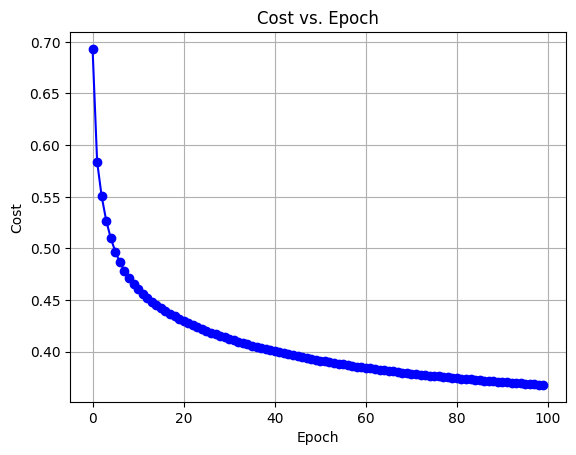

In [113]:
import matplotlib.pyplot as plt


# Create a list of epoch numbers
epochs = range(len(costs))

# Plot the cost vs. epoch curve
plt.plot(epochs, costs, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.grid(True)
plt.show()


Task 9

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('class', axis=1).values
Y = df['class'].values

# Varying percentages of training data
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize a list to store accuracy scores for each percentage
accuracy_scores = []

for percentage in percentages:
    # Split the data into train and test sets with the specified percentage
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - percentage, random_state=42)

    # Initialize weights and bias for training
    n_features = X_train.shape[1]
    w, b = weightInitialization(n_features)

    # Hyperparameters
    learning_rate = 0.0001
    num_iterations = 1000

    # Train the model and get the best weights and bias
    coeff, _ = model_fit(w, b, X_train.T, Y_train, learning_rate, num_iterations)

    # Get the best weights and bias from the trained model
    w_best = coeff["w"]
    b_best = coeff["b"]

    # Make predictions for the test dataset
    Z_test = np.dot(w_best.T, X_test.T) + b_best
    A_test = sigmoid_activation(Z_test)

    # Convert A_test to binary labels (0 or 1)
    Y_pred = np.where(A_test== 1, "Abnormal","Normal")
    Y_pred = Y_pred.reshape(-1)

    # Calculate the accuracy score and store it
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)

# Print accuracy scores for different percentages
for i, percentage in enumerate(percentages):
    print(f"Accuracy for {int(percentage * 100)}% of the training data: {accuracy_scores[i]:.4f}")


Accuracy for 10% of the training data: 0.3297
Accuracy for 20% of the training data: 0.3266
Accuracy for 30% of the training data: 0.3134
Accuracy for 40% of the training data: 0.2957
Accuracy for 50% of the training data: 0.2968
Accuracy for 60% of the training data: 0.2661
Accuracy for 70% of the training data: 0.2660
Accuracy for 80% of the training data: 0.2903
Accuracy for 90% of the training data: 0.2581


Task 10

In [116]:
import numpy as np


def model_optimize_with_regularization(w, b, X, Y, reg=None, lambd=0.1):
    m = X.shape[1]  # Number of data points

    Z = np.dot(w.T, X) + b
    A = sigmoid_activation(Z)


    Y_binary = np.where(Y == "Abnormal", 1, 0).reshape(1, -1)  # Reshape to (1, m)

    # Calculate the cost with regularization
    if reg is None:
        cost = -1/m * np.sum(Y_binary * np.log(A) + (1 - Y_binary) * np.log(1 - A))
    else:
        # Regularization term
        reg_term = (lambd / (2 * m)) * np.sum(w**2)

        cost = (-1/m * np.sum(Y_binary * np.log(A) + (1 - Y_binary) * np.log(1 - A))) + reg_term

    dw = 1/m * np.dot(X, (A - Y_binary).T)
    db = 1/m * np.sum(A - Y_binary)

    if reg is not None:
        # Gradient regularization term
        dw += (lambd / m) * w

    grads = {"dw": dw, "db": db}

    return grads, cost


X = df.drop('class', axis=1).values.T  # Transpose X to match the shape (n_features, m)
Y = df['class'].values

n_features = X.shape[0]  # Number of features
w, b = weightInitialization(n_features)


#model_optimize function
grads, cost = model_optimize_with_regularization(w, b, X, Y)

# Print gradients and cost
print("Gradients:")
print("dw:", grads["dw"])
print("db:", grads["db"])
print("Cost:", cost)



Gradients:
dw: [[-13.57566697]
 [ -4.63547089]
 [-11.91946324]
 [ -8.94019608]
 [-18.99554225]
 [-12.44300139]]
db: -0.1774193548387097
Cost: 0.6931471805599453


Task 11

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=["Epochs", "Regularization", "Lambda", "Test Accuracy"])

epochs_list = [100, 500, 1000]
regularization_list = ["None", "L1", "L2"]
lambda_list = [0.01, 0.1, 1.0]

X = df.drop('class', axis=1).values  # Do not transpose X
Y = df['class'].values

for epochs in epochs_list:
    for regularization in regularization_list:
        for lambd in lambda_list:
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

            n_features = X_train.shape[1]
            w, b = weightInitialization(n_features)

            # Hyperparameters
            learning_rate = 0.0001

            # Train the model for the specified number of epochs
            coeff, _ = model_fit(w, b, X_train.T, Y_train, learning_rate, epochs)

            # Get the best weights and bias from the trained model
            w_best = coeff["w"]
            b_best = coeff["b"]

            # Make predictions for the test dataset
            Z_test = np.dot(w_best.T, X_test.T) + b_best
            A_test = sigmoid_activation(Z_test)

            # Convert A_test to binary labels (0 or 1)
            Y_pred = np.where(A_test == 1, "Abnormal", "Normal")
            Y_pred = Y_pred.reshape(-1)

            # Calculate the test accuracy
            test_accuracy = accuracy_score(Y_test, Y_pred)

            # Append the results to a temporary DataFrame
            temp_df = pd.DataFrame({"Epochs": epochs, "Regularization": regularization, "Lambda": lambd, "Test Accuracy": test_accuracy}, index=[0])

            # Concatenate the temporary DataFrame to the results DataFrame
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

print(results_df)


   Epochs Regularization  Lambda  Test Accuracy
0     100           None    0.01       0.258065
1     100           None    0.10       0.258065
2     100           None    1.00       0.258065
3     100             L1    0.01       0.258065
4     100             L1    0.10       0.258065
5     100             L1    1.00       0.258065
6     100             L2    0.01       0.258065
7     100             L2    0.10       0.258065
8     100             L2    1.00       0.258065
9     500           None    0.01       0.258065
10    500           None    0.10       0.258065
11    500           None    1.00       0.258065
12    500             L1    0.01       0.258065
13    500             L1    0.10       0.258065
14    500             L1    1.00       0.258065
15    500             L2    0.01       0.258065
16    500             L2    0.10       0.258065
17    500             L2    1.00       0.258065
18   1000           None    0.01       0.258065
19   1000           None    0.10       0

Task 12

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an instance of the LogisticRegression model
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# n_features = X_train.shape[1]
# w, b = weightInitialization(n_features)

# # Hyperparameters
# learning_rate = 0.0001
# epochs = 100

# coeff, _ = model_fit(w, b, X_train.T, Y_train, learning_rate, epochs)

# w_best = coeff["w"]
# b_best = coeff["b"]

# Z_test = np.dot(w_best.T, X_test.T) + b_best
# A_test = sigmoid_activation(Z_test)

# # Convert A_test to binary labels (0 or 1)
# Y_pred = np.where(A_test == 1, "Abnormal", "Normal")
# Y_pred = Y_pred.reshape(-1)
# # Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy Score:", accuracy)


Accuracy Score: 0.8817204301075269


Task 13

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an instance of the DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy Score:", accuracy)


Accuracy Score: 0.8064516129032258


Task 14

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create an instance of the Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy Score:", accuracy)


Accuracy Score: 0.7956989247311828
